#  Data Import and Exploration
- Example data: Navigation data for 1 month in Seoul Metropolitan Area (sampled)
- LearnUS - Class Files - Car navigation
- "Navi_data.csv"

### Data import

In [4]:
import pandas as pd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
data_name = 'Navi_data.csv'
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Lectures/2022-2_모빌리티데이터분석및활용/dataset'

data_path = os.path.join(data_dir, data_name)

In [6]:
Tdata = pd.read_csv(data_path)

In [7]:
Tdata.head(3) #> 차량의 위,경도 궤적 데이터

,ID,Date,Time,Longitude,Latitude,Speed
0,502915,20171209,122533,126.888421,37.510334,0.000000
1,502915,20171209,122635,126.888421,37.510334,0.000000
2,502915,20171209,122738,126.888874,37.510986,4.730095


### Selecting a particular vehicle

In [8]:
MyT = Tdata[Tdata.ID == 2028833] # 2028833번 차량 데이터만 추출
MyT #> Time : 13시 52분 06초의 경우 135206으로 표시된다.

,ID,Date,Time,Longitude,Latitude,Speed
27660,2028833,20171206,51050,127.055283,37.896889,0.261370
27661,2028833,20171206,51215,127.055286,37.896944,0.261370
27662,2028833,20171206,51401,127.055286,37.896944,0.000000
27663,2028833,20171206,51543,127.055286,37.896944,0.000000
27664,2028833,20171206,51720,127.055286,37.896944,0.000000
...,...,...,...,...,...,...
28165,2028833,20171228,135206,127.060428,37.869108,6.023972
28166,2028833,20171228,135317,127.057142,37.876977,46.651369
28167,2028833,20171228,135439,127.056639,37.888516,56.261534
28168,2028833,20171228,135548,127.056008,37.892644,24.078523


### Exploring the vehicle

In [9]:
# What dates were this vehicle used?
MyT.Date.unique() #> 차량에서 데이터가 수집된 날짜 추출

array([20171206, 20171207, 20171208, 20171226, 20171228], dtype=int64)

In [10]:
# How many dates were this vehicle used?
MyT.Date.unique().size #> 며칠 차량을 썼나(5일)

5

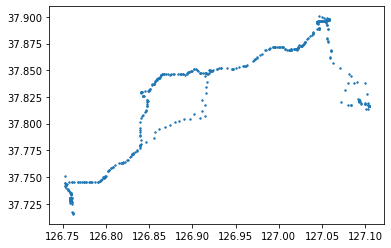

In [11]:
# Plot the points :: 차량 궤적 데이터를 산점도로 표시함. 근데 이 경우 날짜가 구분되지 않는다는 문제가 있음
fig, ax = plt.subplots()
ax.scatter(MyT.Longitude, MyT.Latitude, s = 2) # 's' = size of marker
#> 경도 및 위도가 각각 x, y축이 된다.

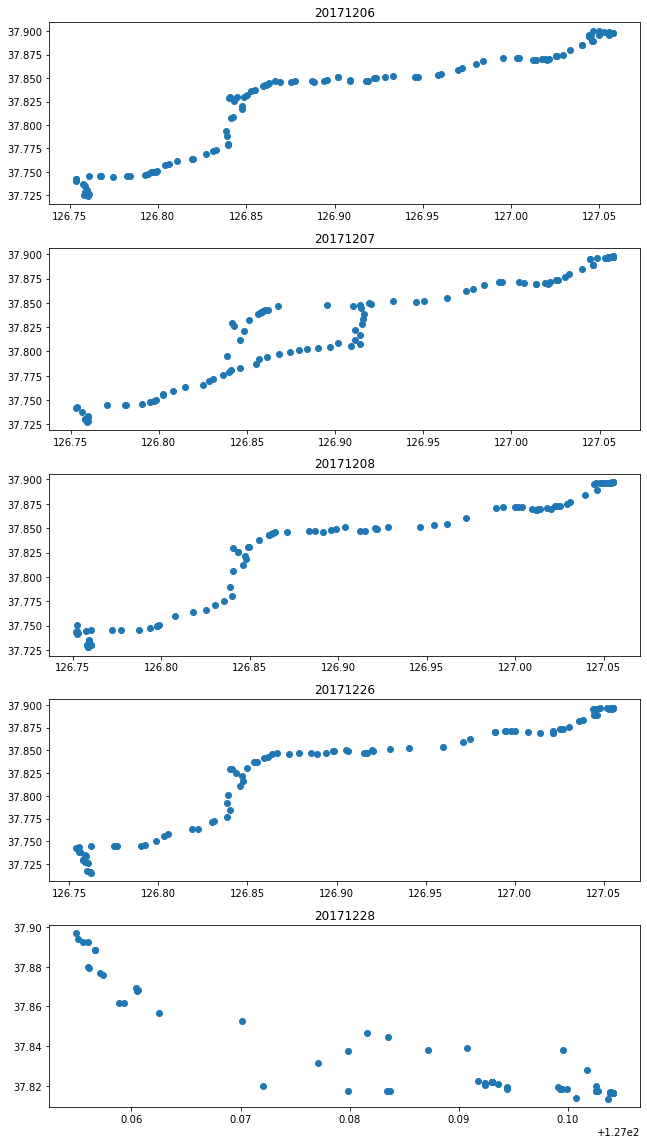

In [12]:
# Improve readability :: Day by day. 일자별로 그래프를 보여준다.
fig, axes = plt.subplots(nrows = MyT.Date.unique().size, ncols = 1, figsize = (9, 16))

n = 0;

for d in MyT.Date.unique(): #> facet을 주어서 일자별로 나타낸건데. 꼭 이래야되나? 그냥 facet_wrap 주면 되는거 아냐?
    axes[n].scatter(MyT.Longitude[MyT.Date == d], MyT.Latitude[MyT.Date == d])
    axes[n].set_title('%s' %d)
    n = n + 1
    
fig.tight_layout() #> 근데, 마지막 날의 경우 축이 통일이 안되어서 전혀 연관성없게 보인다. 그런데 이거 축 통일 해줘야됨 사실.

# Mapping Data on Map

### Open Google map using Bokeh

In [2]:
#%pip install bokeh
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap

In [ ]:
# Put your Google API key
My_key = #> 당신만의 구글 API 키를 받으세요.

### Plotting trajectory data on Google map

In [18]:
output_name = 'MyT.html'
output_path = os.path.join(data_dir, output_name)

In [ ]:
# Plot the data of ID=2028833 (i.e. MyT)
output_file(output_path)
My_lat = MyT.Latitude.mean()
My_lng = MyT.Longitude.mean()

map_options = GMapOptions(lat = My_lat, lng = My_lng, map_type = "roadmap", zoom = 11)
My_area = gmap(My_key, map_options) 

Data= ColumnDataSource(MyT)
center = My_area.circle('Longitude','Latitude', size = 4, color = 'red', source = Data)

show(My_area) #> 실행하면, 인터랙티브 지도 위에 그래프가 그려져 나오는 것을 볼 수 있다.

In [ ]:
# Plot the data of the 1st date
#> 구글 맵의 중앙 위치(center location)를 지정해줄 수 있다 : 내 데이터의 각각의 위,경도 평균값을 중심점으로 설정하라.
#> 그리고 적절한 배율을 zoom에 대입하여 설정하라

Date = 20171206 #> 이 날짜 것만 보자

output_file("MyT_%s.html" % Date)

map_options = GMapOptions(lat = My_lat, lng = My_lng, map_type = "roadmap", zoom = 11) #> 중심점 설정
My_area = gmap(My_key, map_options, title="MyT_%s"% Date) 

Data= ColumnDataSource(MyT[MyT.Date==Date])
center = My_area.circle('Longitude','Latitude', size=4, color='red', source = Data)

show(My_area)

In [ ]:
# Plot the data by date :: 각각의 일자별로 지도를 그려보고 싶어!!
#> 4개의 html 창 탭에 각각 다른 일자의 산점도+지도가 출력된다. 히힝!

def MyTplot_d(MyT,Date):
    output_file("MyT_%s.html" % Date)
    map_options = GMapOptions(lat = My_lat, lng = My_lng, map_type = "roadmap", zoom = 11)
    My_area = gmap(My_key, map_options, title = "MyT_%s"% Date) 
    
    Data = ColumnDataSource(MyT[MyT.Date == Date])
    center = My_area.circle('Longitude','Latitude', size = 4, color = 'red', source = Data)
    show(My_area)

for Date in MyT.Date.unique():
    MyTplot_d(MyT, Date) #> 지도를 만들어주는 함수를 만들어서 일자별로 반복문 돌린거다.


# Trajectory Segmentation and Stop Discovery

### Exercise (1): Plot speed & time graph with respect to MyT

In [13]:
# Create a variable representing "time of day" <== "Time" need to be modified.
#> 시, 분, 초를 파싱하기 :: 몫만 구하는 // 연산자를 이용해준다.
#> 활동 장소(activity location)을 알아내기 위한 작업을 이제부터 할 것이다. 각각의 다른 통행별로 잘라 주기

MyT['Time_hh'] = MyT.Time//10000
MyT['Time_mm'] = (MyT.Time//100) - (MyT.Time_hh * 100)
MyT['Time_ss'] = MyT.Time - (MyT.Time_hh * 10000) - (MyT.Time_mm * 100)

MyT

<ipython-input-13-284a39dd372a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MyT['Time_hh'] = MyT.Time//10000
<ipython-input-13-284a39dd372a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MyT['Time_mm'] = (MyT.Time//100) - (MyT.Time_hh * 100)
<ipython-input-13-284a39dd372a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,ID,Date,Time,Longitude,Latitude,Speed,Time_hh,Time_mm,Time_ss
27660,2028833,20171206,51050,127.055283,37.896889,0.261370,5,10,50
27661,2028833,20171206,51215,127.055286,37.896944,0.261370,5,12,15
27662,2028833,20171206,51401,127.055286,37.896944,0.000000,5,14,1
27663,2028833,20171206,51543,127.055286,37.896944,0.000000,5,15,43
27664,2028833,20171206,51720,127.055286,37.896944,0.000000,5,17,20
...,...,...,...,...,...,...,...,...,...
28165,2028833,20171228,135206,127.060428,37.869108,6.023972,13,52,6
28166,2028833,20171228,135317,127.057142,37.876977,46.651369,13,53,17
28167,2028833,20171228,135439,127.056639,37.888516,56.261534,13,54,39
28168,2028833,20171228,135548,127.056008,37.892644,24.078523,13,55,48


In [14]:
### Hour-unit
MyT['Time_H'] = MyT.Time_hh + (MyT.Time_mm/60) + (MyT.Time_ss/3600) #> 3600단위 시간변수로 환산해주었다

MyT

<ipython-input-14-ca208d427c4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MyT['Time_H'] = MyT.Time_hh + (MyT.Time_mm/60) + (MyT.Time_ss/3600) #> 3600단위 시간변수로 환산해주었다


,ID,Date,Time,Longitude,Latitude,Speed,Time_hh,Time_mm,Time_ss,Time_H
27660,2028833,20171206,51050,127.055283,37.896889,0.261370,5,10,50,5.180556
27661,2028833,20171206,51215,127.055286,37.896944,0.261370,5,12,15,5.204167
27662,2028833,20171206,51401,127.055286,37.896944,0.000000,5,14,1,5.233611
27663,2028833,20171206,51543,127.055286,37.896944,0.000000,5,15,43,5.261944
27664,2028833,20171206,51720,127.055286,37.896944,0.000000,5,17,20,5.288889
...,...,...,...,...,...,...,...,...,...,...
28165,2028833,20171228,135206,127.060428,37.869108,6.023972,13,52,6,13.868333
28166,2028833,20171228,135317,127.057142,37.876977,46.651369,13,53,17,13.888056
28167,2028833,20171228,135439,127.056639,37.888516,56.261534,13,54,39,13.910833
28168,2028833,20171228,135548,127.056008,37.892644,24.078523,13,55,48,13.930000


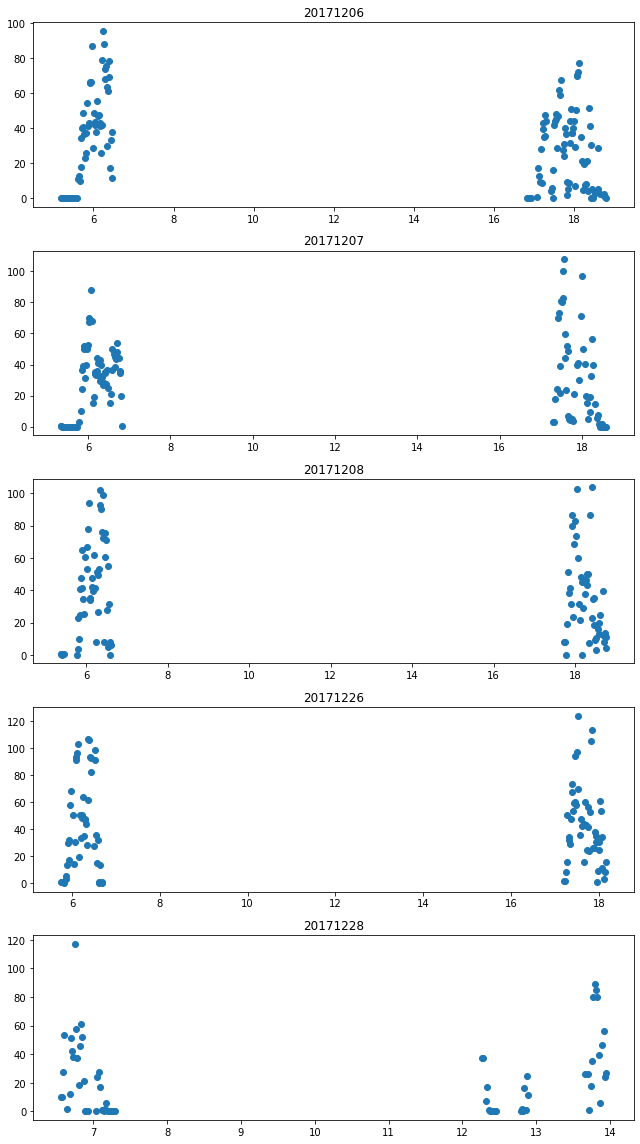

In [15]:
# Plot speed & time graph by date
import matplotlib as mpl
import matplotlib.pyplot as plt

#> x축 : 하루 24시간

fig, axes = plt.subplots(nrows = MyT.Date.unique().size, ncols = 1, figsize = (9, 16))

n = 0;

for d in MyT.Date.unique():
    axes[n].scatter(MyT.Time_H[MyT.Date == d], MyT.Speed[MyT.Date == d])
    axes[n].set_title('%s' %d)
    n = n + 1
    
fig.tight_layout()

### Exercise (2): Trajectory segmentation based on the following rule:
- It is the end of a trip when collecting GPS information stops because this might mean that the car engine is turned off.
- Considering the time interval between data points (1-3 min.) and the GPS shadow area, it is assumed that a trip ends when the time gap between data points is longer than 10 minuities (0.1667 hour).

##### Conceptual diagram
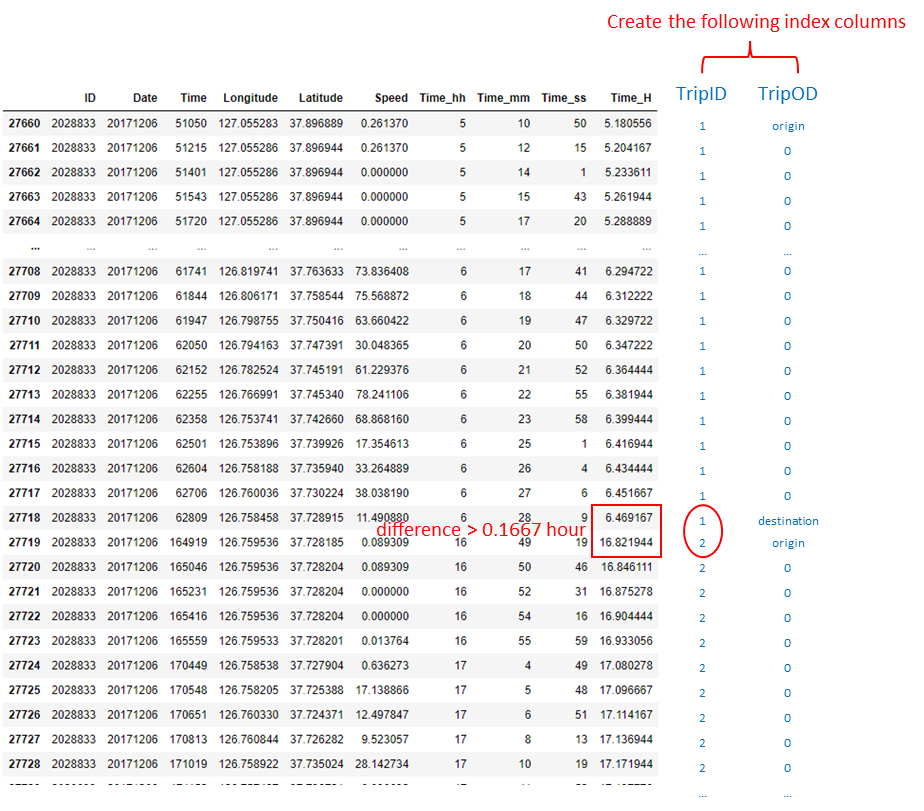

##### Algorithm
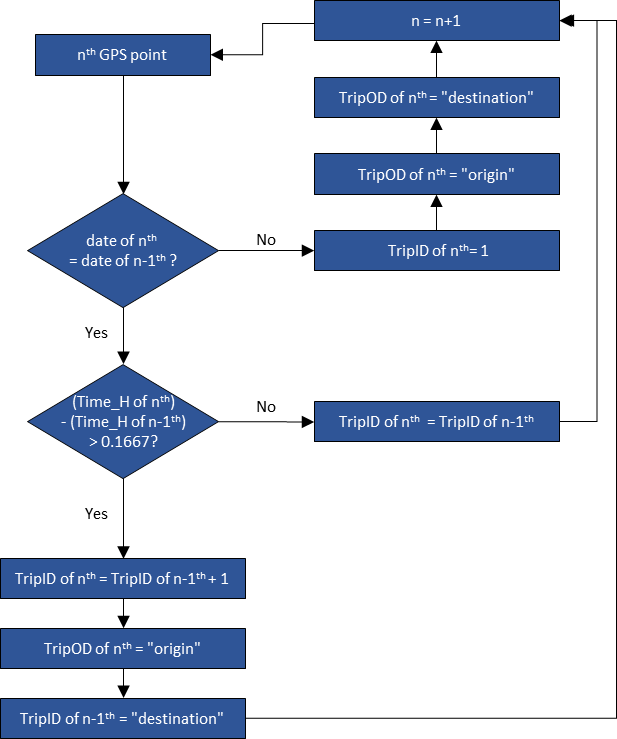

In [16]:
# 위 알고리즘과 설명들은 하루의 통행들에 번호를 매기는(통행 세그먼트 쪼개는) 과정을 나타낸 것임
# 다른 통행으로 간주하는 임계 시간은 10분으로, 약 0.1667 시간이 될 것임

# Set-up and initialization
MyT['TripID'] = 0
MyT['TripOD'] = 0

MyT.TripID.iloc[0] = 1 
MyT.TripOD.iloc[0] = 'origin'
MyT.TripOD.iloc[len(MyT) - 1] = 'destination' 

MyT

<ipython-input-16-ec9c90d82cc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MyT['TripID'] = 0
<ipython-input-16-ec9c90d82cc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MyT['TripOD'] = 0
C:\dev\Anaconda_3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_s

,ID,Date,Time,Longitude,Latitude,Speed,Time_hh,Time_mm,Time_ss,Time_H,TripID,TripOD
27660,2028833,20171206,51050,127.055283,37.896889,0.261370,5,10,50,5.180556,1,origin
27661,2028833,20171206,51215,127.055286,37.896944,0.261370,5,12,15,5.204167,0,0
27662,2028833,20171206,51401,127.055286,37.896944,0.000000,5,14,1,5.233611,0,0
27663,2028833,20171206,51543,127.055286,37.896944,0.000000,5,15,43,5.261944,0,0
27664,2028833,20171206,51720,127.055286,37.896944,0.000000,5,17,20,5.288889,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28165,2028833,20171228,135206,127.060428,37.869108,6.023972,13,52,6,13.868333,0,0
28166,2028833,20171228,135317,127.057142,37.876977,46.651369,13,53,17,13.888056,0,0
28167,2028833,20171228,135439,127.056639,37.888516,56.261534,13,54,39,13.910833,0,0
28168,2028833,20171228,135548,127.056008,37.892644,24.078523,13,55,48,13.930000,0,0


In [17]:
# Segmenting
for n in range(1, len(MyT)):
    if MyT.Date.iloc[n] == MyT.Date.iloc[n-1]:
        if (MyT.Time_H.iloc[n] - MyT.Time_H.iloc[n-1]) > 0.1667:
            MyT.TripID.iloc[n] = MyT.TripID.iloc[n-1] + 1
            MyT.TripOD.iloc[n] = "origin"
            MyT.TripOD.iloc[n-1] = "destination"
        else:
            MyT.TripID.iloc[n] = MyT.TripID.iloc[n-1]
    else:
        MyT.TripID.iloc[n] = 1
        MyT.TripOD.iloc[n] = "origin"
        MyT.TripOD.iloc[n-1] = "destination"
        
MyT

C:\dev\Anaconda_3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\dev\Anaconda_3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,ID,Date,Time,Longitude,Latitude,Speed,Time_hh,Time_mm,Time_ss,Time_H,TripID,TripOD
27660,2028833,20171206,51050,127.055283,37.896889,0.261370,5,10,50,5.180556,1,origin
27661,2028833,20171206,51215,127.055286,37.896944,0.261370,5,12,15,5.204167,1,0
27662,2028833,20171206,51401,127.055286,37.896944,0.000000,5,14,1,5.233611,1,0
27663,2028833,20171206,51543,127.055286,37.896944,0.000000,5,15,43,5.261944,1,0
27664,2028833,20171206,51720,127.055286,37.896944,0.000000,5,17,20,5.288889,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28165,2028833,20171228,135206,127.060428,37.869108,6.023972,13,52,6,13.868333,4,0
28166,2028833,20171228,135317,127.057142,37.876977,46.651369,13,53,17,13.888056,4,0
28167,2028833,20171228,135439,127.056639,37.888516,56.261534,13,54,39,13.910833,4,0
28168,2028833,20171228,135548,127.056008,37.892644,24.078523,13,55,48,13.930000,4,0


In [19]:
# Dispaly: Expansion of table
# pd.set_option('display.max_rows', None) #> 모든 행을 다 보고 싶으면 그렇게 한다
# MyT

### Exercise (3): Plotting trajectory data of each trip on Google map

In [ ]:
# Plot the data with differently colored points by Trip ID #> 통행별로 다른 색깔로 표시함(근데 별로 안이쁨)
def MyTplot_d(MyT,Date):
    output_file("MyT_%s.html" % Date)
    map_options = GMapOptions(lat = My_lat, lng = My_lng, map_type = "roadmap", zoom = 11)
    My_area = gmap(My_key, map_options, title = "MyT_%s"% Date) 
    
    colors = ['red', 'green', 'blue', 'black', 'indigo']
    
    for i in range(max(list(MyT.TripID[MyT.Date==Date])))###### 이부분 복구 필요함
        Data= ColumnDataSource(MyT[(MyT.Date==Date) & (MyT.TripID==i+1)])
        center = My_area.circle('Longitude','Latitude', size=4, color=colors[i], source = Data)
    show(My_area)

for Date in MyT.Date.unique():
    MyTplot_d(MyT,Date)

### Exercise (4): Identifying home and work places

In [ ]:
#Q) Where does the driver of vehicle ID=2028833 probably live?
### Plot the origins of the 1st trip of each day on google map
output_file("MyT_origins_1st_trip.html")
map_options = GMapOptions(lat=My_lat, lng=My_lng, map_type="roadmap", zoom=11)
My_area = gmap(My_key, map_options, title="The origins of the 1st trip of each day") 

Data= ColumnDataSource(MyT[(MyT.TripID==1) & (MyT.TripOD=="origin")])
center = My_area.circle('Longitude','Latitude', size=4, color='red', source = Data)
show(My_area)

In [ ]:
### Zoom-in
from bokeh.models.annotations import Label, LabelSet

output_file("MyT_origins_1st_trip.html")
My_lat_o = MyT.Latitude[(MyT.TripID==1) & (MyT.TripOD=="origin")].mean()
My_lng_o = MyT.Longitude[(MyT.TripID==1) & (MyT.TripOD=="origin")].mean()

map_options = GMapOptions(lat=My_lat_o, lng=My_lng_o, map_type="roadmap", zoom=15)
My_area = gmap(My_key, map_options, title="The origins of the 1st trip of each day") 

Data= ColumnDataSource(MyT[(MyT.TripID==1) & (MyT.TripOD=="origin")])
center = My_area.circle('Longitude','Latitude', size=4, color='red', source = Data)

show(My_area)

### Exercise (5): Developing trip data from point (trajectory) data

##### Goal
- Each row indicates one trip (episode)
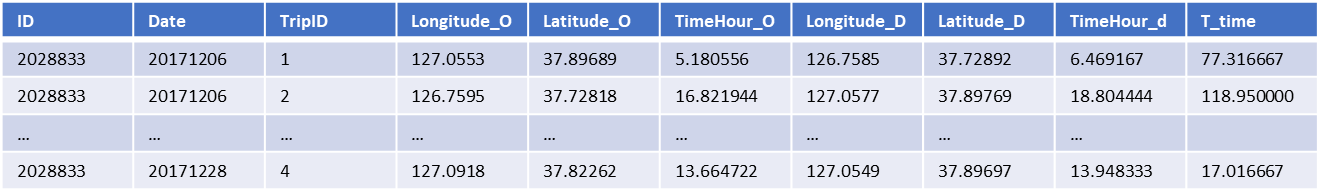

In [20]:
# Create base data frame
MyT_Trip = MyT.loc[:,['ID','Date','TripID']]

MyT_Trip = MyT_Trip.drop_duplicates()

MyT_Trip

,ID,Date,TripID
27660,2028833,20171206,1
27719,2028833,20171206,2
27795,2028833,20171207,1
27861,2028833,20171207,2
27911,2028833,20171208,1
27915,2028833,20171208,2
27960,2028833,20171208,3
28007,2028833,20171226,1
28054,2028833,20171226,2
28103,2028833,20171228,1


In [21]:
# Create columns
MyT_Trip['Longitude_O']=0
MyT_Trip['Latitude_O']=0
MyT_Trip['Time_H_O']=0

MyT_Trip['Longitude_D']=0
MyT_Trip['Latitude_D']=0
MyT_Trip['Time_H_D']=0

MyT_Trip['T_time']=0

MyT_Trip

,ID,Date,TripID,Longitude_O,Latitude_O,Time_H_O,Longitude_D,Latitude_D,Time_H_D,T_time
27660,2028833,20171206,1,0,0,0,0,0,0,0
27719,2028833,20171206,2,0,0,0,0,0,0,0
27795,2028833,20171207,1,0,0,0,0,0,0,0
27861,2028833,20171207,2,0,0,0,0,0,0,0
27911,2028833,20171208,1,0,0,0,0,0,0,0
27915,2028833,20171208,2,0,0,0,0,0,0,0
27960,2028833,20171208,3,0,0,0,0,0,0,0
28007,2028833,20171226,1,0,0,0,0,0,0,0
28054,2028833,20171226,2,0,0,0,0,0,0,0
28103,2028833,20171228,1,0,0,0,0,0,0,0


In [22]:
# Complete the table
m = 0
for n in range(0,len(MyT)):
    if (MyT.Date.iloc[n]==MyT_Trip.Date.iloc[m]) & (MyT.TripID.iloc[n]==MyT_Trip.TripID.iloc[m]):
        if MyT.TripOD.iloc[n]=="origin":
            MyT_Trip.Longitude_O.iloc[m]=MyT.Longitude.iloc[n]
            MyT_Trip.Latitude_O.iloc[m]=MyT.Latitude.iloc[n]
            MyT_Trip.Time_H_O.iloc[m]=MyT.Time_H.iloc[n]
        elif MyT.TripOD.iloc[n]=="destination":
            MyT_Trip.Longitude_D.iloc[m]=MyT.Longitude.iloc[n]
            MyT_Trip.Latitude_D.iloc[m]=MyT.Latitude.iloc[n]
            MyT_Trip.Time_H_D.iloc[m]=MyT.Time_H.iloc[n]
            
            MyT_Trip.T_time.iloc[m]=(MyT_Trip.Time_H_D.iloc[m]-MyT_Trip.Time_H_O.iloc[m])*60
            m = m+1
                    

MyT_Trip

C:\dev\Anaconda_3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ID,Date,TripID,Longitude_O,Latitude_O,Time_H_O,Longitude_D,Latitude_D,Time_H_D,T_time
27660,2028833,20171206,1,127.055283,37.896889,5.180556,126.758458,37.728915,6.469167,77.316667
27719,2028833,20171206,2,126.759536,37.728185,16.821944,127.057730,37.897686,18.804444,118.950000
27795,2028833,20171207,1,127.055280,37.896858,5.330278,126.757919,37.730051,6.830000,89.983333
27861,2028833,20171207,2,126.759291,37.727835,17.292778,127.057633,37.897480,18.590000,77.833333
27911,2028833,20171208,1,127.055283,37.896905,5.367778,127.055294,37.897069,5.441944,4.450000
27915,2028833,20171208,2,127.054858,37.897327,5.770278,126.758611,37.727896,6.608611,50.300000
27960,2028833,20171208,3,126.758769,37.728124,17.730000,127.054280,37.896614,18.768333,62.300000
28007,2028833,20171226,1,127.055277,37.896808,5.739167,126.758624,37.728174,6.693056,57.233333
28054,2028833,20171226,2,126.761394,37.716624,17.213056,127.052858,37.896005,18.172222,57.550000
28103,2028833,20171228,1,127.055063,37.894191,6.557500,127.092998,37.822017,7.297222,44.383333


### Exercise (6): Extracting knowledge

In [23]:
# The number of trips generated for the month?
Ndate = len(MyT_Trip)
print(Ndate)

13


In [24]:
# Total travel time per day
import numpy as np
Date_time = pd.pivot_table(MyT_Trip, values='T_time', index=['Date'], aggfunc=np.sum)

Date_time

,T_time
Date,
20171206,196.266667
20171207,167.816667
20171208,117.050000
20171226,114.783333
20171228,79.133333


In [25]:
# Average travel time per day
Date_time.T_time.mean() #> 배고파... 순대국밥 먹고싶어... 배고파... 백암순대국 뜨뜻한 국밥한그릇...

135.01000000000002